# Topic modelling using GENSIM

In [19]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import matutils, models
import scipy.sparse

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize


In [3]:
#read pickle file
import pickle
train_data=pd.read_pickle("train_first_data.pkl")
train_data

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Review,Rating
0,0,exceptional service nice daughter priced king ...,5
1,1,beautiful relaxing jw marriott desert ridge ou...,5
2,2,location location min subway take blommingdale...,5
3,3,pleased nice safe flower market vast array res...,3
4,4,excellent service excellent location couple mi...,4
...,...,...,...
14338,14338,madrid perfect location tiny quiet street cent...,5
14339,14339,excellent florence chosen tripadviser hidden g...,5
14340,14340,place relax vacation book trip paradisus husba...,4
14341,14341,week seattle loved minute pacific plaza buy im...,3


In [4]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(train_data["Review"]))

print(data_words[:1])

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['exceptional', 'service', 'nice', 'daughter', 'priced', 'king', 'suite', 'weekend', 'night', 'impressed', 'exceptionally', 'welcoming', 'service', 'reservation', 'departure', 'employee', 'talked', 'friendly', 'eager', 'question', 'amazed', 'age', 'shaped', 'pool', 'tiny', 'looked', 'fun', 'kid', 'hot', 'tub', 'exercise', 'breakfast', 'abundant', 'make', 'waffle', 'add', 'scrambled', 'egg', 'bacon', 'sausage', 'fruit', 'bagel', 'muffin', 'oatmeal', 'yogurt', 'wanted', 'morning', 'sort', 'long', 'line', 'waiting', 'make', 'waffle', 'waiting', 'scrambled', 'egg', 'nice', 'asked', 'freeway', 'reading', 'review', 'earlier', 'bit', 'noisy', 'hey', 'city', 'felt', 'deluxe', 'reasonable', 'price', 'nice', 'bedding', 'art', 'wall', 'space', 'needle', 'bit', 'window', 'shuttle', 'run', 'hourly', 'reserve', 'place', 'worked', 'shuttle', 'missed', 'minute', 'needed', 'return', 'space', 'needle', 'promptly', 'paid', 'cab', 'fare', 'asked', 'downtown', 'seattle']]


In [5]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
data_dtm= [id2word.doc2bow(rev) for rev in data_words]

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
data_dtm

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 3),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 2),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 2),
  (77, 2),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1)],
 [(25, 1),
  (27, 1),
  (52, 2),
  (67, 1),
  (85, 1),
  (86, 1),
  (87, 1

In [20]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

In [21]:
#now we created corpus,dictionary
#next we have to specify number of topics and number of passes and create the LDA model
lda = models.LdaModel(corpus=data_dtm, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.014*"beach" + 0.011*"pool" + 0.011*"food" + 0.008*"restaurant" + 0.007*"service" + 0.007*"people" + 0.007*"staff" + 0.006*"nice" + 0.006*"water" + 0.005*"place"'),
 (1,
  '0.013*"staff" + 0.013*"location" + 0.011*"room" + 0.010*"breakfast" + 0.009*"nice" + 0.008*"clean" + 0.007*"bed" + 0.006*"place" + 0.006*"service" + 0.006*"bathroom"')]

In [24]:
#LDA model foe num_topics=5
lda = models.LdaModel(corpus=data_dtm, id2word=id2word, num_topics=5, passes=10)
lda.print_topics()

[(0,
  '0.018*"location" + 0.013*"breakfast" + 0.013*"staff" + 0.012*"nice" + 0.012*"room" + 0.012*"clean" + 0.009*"walk" + 0.008*"restaurant" + 0.008*"small" + 0.007*"area"'),
 (1,
  '0.024*"staff" + 0.015*"wonderful" + 0.012*"service" + 0.011*"place" + 0.011*"florence" + 0.009*"view" + 0.009*"friendly" + 0.009*"trip" + 0.008*"beautiful" + 0.008*"helpful"'),
 (2,
  '0.012*"service" + 0.012*"pool" + 0.009*"restaurant" + 0.008*"spa" + 0.006*"airport" + 0.006*"villa" + 0.005*"bali" + 0.005*"guest" + 0.005*"food" + 0.005*"area"'),
 (3,
  '0.009*"bed" + 0.009*"desk" + 0.009*"room" + 0.009*"service" + 0.007*"staff" + 0.006*"told" + 0.006*"check" + 0.006*"floor" + 0.005*"place" + 0.005*"bathroom"'),
 (4,
  '0.022*"beach" + 0.015*"food" + 0.013*"pool" + 0.010*"restaurant" + 0.009*"people" + 0.009*"nice" + 0.007*"water" + 0.007*"staff" + 0.007*"bar" + 0.007*"drink"')]

# Compute Model Perplexity and Coherence Score

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is.

In [26]:
# Compute Perplexity
print('Perplexity: ', lda.log_perplexity(data_dtm))  # a measure of how good the model is. lower the better.



Perplexity:  -7.8613078892272


In [27]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.387630712882794


best topic model has lower perplexity and higher coherence score.

so we have to change number topics to get better coherence score

# Visualize the topics-keywords

In [28]:
pyLDAvis.enable_notebook()
topic_vis = pyLDAvis.gensim.prepare(lda, data_dtm, id2word)
topic_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.030458 -0.084913       1        1  33.414254
4     -0.056400 -0.016915       2        1  30.353739
3     -0.073916 -0.144024       3        1  21.950649
1      0.237073  0.066049       4        1   7.340200
2     -0.137215  0.179803       5        1   6.941158, topic_info=          Term          Freq         Total Category  logprob  loglift
259      beach   7506.000000   7506.000000  Default  30.0000  30.0000
143      staff  11308.000000  11308.000000  Default  29.0000  29.0000
52        pool   6020.000000   6020.000000  Default  28.0000  28.0000
170   location   7646.000000   7646.000000  Default  27.0000  27.0000
151  wonderful   2760.000000   2760.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
28       fruit    189.845165   1021.022787   Topic5  -6.0205   0.9854
829      fresh    190.555051   1226.075277   Topic5  -6.0167   0.8061
110       hour    206.981333   2759.205443   Topic5  -5.9340   0.0776
10   breakfast    206.827954   6706.512619   Topic5  -5.9348  -0.8112
148       trip    187.877783   3753.792278   Topic5  -6.0309  -0.3270

[421 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
292       1  0.133031  absolutely
292       2  0.323202  absolutely
292       3  0.127674  absolutely
292       4  0.386592  absolutely
292       5  0.030356  absolutely
...     ...       ...         ...
152       5  0.016352        year
1205      1  0.001917        york
1205      2  0.030665        york
1205      3  0.007666        york
1205      4  0.958278        york

[883 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 4, 2, 3])

#here overlapping bettween  topics occured because of topic selection

with the help of following set codes we can choose right number of topics


In [29]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [30]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=data_dtm, texts=data_words, start=2, limit=50, step=1)

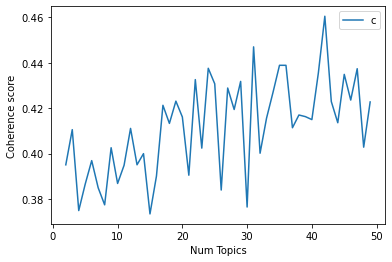

In [31]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [32]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3951
Num Topics = 3  has Coherence Value of 0.4105
Num Topics = 4  has Coherence Value of 0.3749
Num Topics = 5  has Coherence Value of 0.3866
Num Topics = 6  has Coherence Value of 0.3969
Num Topics = 7  has Coherence Value of 0.385
Num Topics = 8  has Coherence Value of 0.3775
Num Topics = 9  has Coherence Value of 0.4026
Num Topics = 10  has Coherence Value of 0.3869
Num Topics = 11  has Coherence Value of 0.3949
Num Topics = 12  has Coherence Value of 0.4111
Num Topics = 13  has Coherence Value of 0.3951
Num Topics = 14  has Coherence Value of 0.4
Num Topics = 15  has Coherence Value of 0.3735
Num Topics = 16  has Coherence Value of 0.3901
Num Topics = 17  has Coherence Value of 0.4212
Num Topics = 18  has Coherence Value of 0.4133
Num Topics = 19  has Coherence Value of 0.4231
Num Topics = 20  has Coherence Value of 0.4161
Num Topics = 21  has Coherence Value of 0.3905
Num Topics = 22  has Coherence Value of 0.4326
Num Topics = 23  has Cohe

In [33]:
#LDA model for num_topics=42
lda = models.LdaModel(corpus=data_dtm, id2word=id2word, num_topics=42, passes=10)
lda.print_topics()

[(27,
  '0.030*"cultural" + 0.029*"personable" + 0.027*"ive" + 0.025*"mate" + 0.017*"fajardo" + 0.015*"confortable" + 0.015*"hiring" + 0.011*"desperately" + 0.010*"gbp" + 0.010*"robbed"'),
 (29,
  '0.034*"wedding" + 0.018*"anniversary" + 0.018*"wine" + 0.016*"staff" + 0.014*"majestic" + 0.014*"champagne" + 0.014*"service" + 0.013*"evening" + 0.011*"special" + 0.010*"bottle"'),
 (1,
  '0.179*"park" + 0.052*"baby" + 0.038*"cot" + 0.031*"helpfull" + 0.028*"bryant" + 0.022*"germain" + 0.021*"unbeatable" + 0.019*"statue" + 0.016*"jolly" + 0.015*"gay"'),
 (13,
  '0.044*"law" + 0.040*"gold" + 0.031*"brother" + 0.027*"casablanca" + 0.026*"parent" + 0.024*"catered" + 0.020*"select" + 0.019*"tee" + 0.017*"multi" + 0.016*"fashioned"'),
 (26,
  '0.139*"paris" + 0.046*"tower" + 0.044*"metro" + 0.034*"french" + 0.020*"eiffel" + 0.016*"heating" + 0.015*"cafe" + 0.014*"rue" + 0.014*"small" + 0.013*"france"'),
 (18,
  '0.178*"cruise" + 0.035*"ship" + 0.022*"prior" + 0.021*"terminal" + 0.020*"reccommend

In [34]:
pyLDAvis.enable_notebook()
topic_vis = pyLDAvis.gensim.prepare(lda, data_dtm, id2word)
topic_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
25    -0.274909  0.136932       1        1  15.061119
4     -0.275924  0.099021       2        1   9.862982
31    -0.300282 -0.050525       3        1   8.978398
6     -0.240416  0.127663       4        1   7.029315
34    -0.282615  0.024699       5        1   6.710103
0     -0.202953  0.168013       6        1   5.737969
33    -0.241165  0.067892       7        1   5.730522
5     -0.296742 -0.133609       8        1   5.279322
12    -0.299650 -0.126395       9        1   5.268150
22    -0.290223 -0.162237      10        1   4.698229
37    -0.269774 -0.207045      11        1   4.212669
8     -0.251069 -0.134929      12        1   3.370461
2     -0.201296  0.044903      13        1   3.032934
38    -0.120592 -0.022900      14        1   1.869756
29    -0.096650  0.154381      15        1   1.576858
40    -0.064677  0.118423      16        1   1.199062
35    -0.013797  0.131933      17        1   1.135617
3     -0.045682  0.082617      18        1   1.112786
32    -0.044242  0.096455      19        1   1.017718
39     0.030491 -0.122043      20        1   0.680846
28     0.080035  0.097331      21        1   0.621465
26     0.054990 -0.138546      22        1   0.527987
30     0.061676 -0.116480      23        1   0.478734
7      0.126384  0.048569      24        1   0.476038
41     0.113703 -0.039504      25        1   0.473238
20     0.132577  0.017214      26        1   0.427387
23     0.154029 -0.047946      27        1   0.342897
24     0.165710 -0.019858      28        1   0.324913
36     0.188349  0.000968      29        1   0.260696
14     0.188312  0.014876      30        1   0.258159
17     0.195553 -0.010565      31        1   0.231963
13     0.200632 -0.004679      32        1   0.224569
27     0.197061  0.003757      33        1   0.223860
11     0.194500 -0.013006      34        1   0.212196
21     0.210133 -0.009360      35        1   0.206731
15     0.202174 -0.007788      36        1   0.204321
1      0.201668 -0.016964      37        1   0.202038
18     0.211594 -0.012371      38        1   0.185727
9      0.212379 -0.007195      39        1   0.173296
19     0.221432 -0.011702      40        1   0.146541
10     0.228378 -0.010211      41        1   0.137140
16     0.240898 -0.009787      42        1   0.095289, topic_info=             Term         Freq        Total Category  logprob  loglift
259         beach  7796.000000  7796.000000  Default  30.0000  30.0000
52           pool  6276.000000  6276.000000  Default  29.0000  29.0000
420          view  4250.000000  4250.000000  Default  28.0000  28.0000
67        service  8050.000000  8050.000000  Default  27.0000  27.0000
10      breakfast  7020.000000  7020.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
3803        leafy     3.489516     4.408506  Topic42  -5.7286   6.7222
4266        field    34.217924    52.611505  Topic42  -3.4456   6.5258
2372          out     5.151561     9.277304  Topic42  -5.3391   6.3677
6296  honeymooner     6.329041    38.873290  Topic42  -5.1332   5.1409
2369           in     4.047148     6.486614  Topic42  -5.5803   6.4843

[2399 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
6658      33  0.967537     absolut
292        1  0.169123  absolutely
292        2  0.072723  absolutely
292        3  0.017758  absolutely
292        4  0.004228  absolutely
...      ...       ...         ...
7925      39  0.924542       youth
5797      18  0.973627      yunque
3694      42  0.944697         zen
11819      1  0.198015         zip
11819     41  0.726056         zip

[6159 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[26, 5, 32, 7, 35, 1, 34, 6, 13, 23, 38, 9, 3, 39, 30, 41, 36, 4, 33, 40, 29, 27, 31, 8, 42, 21, 24, 25, 37, 15, 18, 14, 28, 12, 22,

# Topic modeling Noun and Adjectives

In [36]:
from nltk import word_tokenize, pos_tag

def noun_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2]=='JJ'
    tokenized = word_tokenize(text)
    all_nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(all_nouns_adj)

In [39]:
# Apply the nouns function to the Text  to filter only on nouns
train_data["noun_adj"]=train_data["Review"].apply(noun_adj)

In [40]:
train_data

,ID,Review,Rating,noun_adj
0,0,exceptional service nice daughter priced king ...,5,exceptional service nice daughter suite weeken...
1,1,beautiful relaxing jw marriott desert ridge ou...,5,beautiful jw marriott desert ridge outstanding...
2,2,location location min subway take blommingdale...,5,location location take blommingdales perfect m...
3,3,pleased nice safe flower market vast array res...,3,pleased nice safe flower market vast array res...
4,4,excellent service excellent location couple mi...,4,excellent service excellent location couple mi...
...,...,...,...,...
14338,14338,madrid perfect location tiny quiet street cent...,5,madrid perfect location tiny quiet street cent...
14339,14339,excellent florence chosen tripadviser hidden g...,5,excellent florence hidden gem florence chance ...
14340,14340,place relax vacation book trip paradisus husba...,4,place vacation book trip paradisus fabulous re...
14341,14341,week seattle loved minute pacific plaza buy im...,3,week minute pacific plaza improvement floor he...


In [41]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(train_data["noun_adj"]))

print(data_words[:1])

[['exceptional', 'service', 'nice', 'daughter', 'suite', 'weekend', 'night', 'service', 'reservation', 'departure', 'employee', 'friendly', 'eager', 'question', 'age', 'pool', 'tiny', 'fun', 'kid', 'hot', 'tub', 'exercise', 'breakfast', 'abundant', 'make', 'waffle', 'egg', 'bacon', 'sausage', 'fruit', 'bagel', 'muffin', 'oatmeal', 'yogurt', 'morning', 'sort', 'line', 'waffle', 'scrambled', 'egg', 'nice', 'review', 'bit', 'noisy', 'hey', 'city', 'deluxe', 'reasonable', 'price', 'nice', 'art', 'wall', 'space', 'needle', 'bit', 'window', 'shuttle', 'reserve', 'place', 'shuttle', 'minute', 'return', 'space', 'cab', 'fare', 'downtown', 'seattle']]


In [42]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

In [43]:
#convert ito document term matrix
data_dtm= [id2word.doc2bow(rev) for rev in data_words]

In [44]:
data_dtm

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 3),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 2),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1)],
 [(36, 2),
  (47, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 2),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 2),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1

In [45]:
#next we have to specify number of topics and number of passes and create the LDA model
lda = models.LdaModel(corpus=data_dtm, id2word=id2word, num_topics=10, passes=10)
lda.print_topics()


[(0,
  '0.014*"service" + 0.013*"desk" + 0.012*"room" + 0.010*"staff" + 0.008*"place" + 0.008*"check" + 0.008*"problem" + 0.008*"door" + 0.007*"thing" + 0.007*"people"'),
 (1,
  '0.029*"service" + 0.025*"staff" + 0.020*"view" + 0.013*"wonderful" + 0.012*"room" + 0.011*"hotel" + 0.010*"excellent" + 0.009*"location" + 0.009*"experience" + 0.009*"fantastic"'),
 (2,
  '0.029*"bathroom" + 0.022*"bed" + 0.020*"shower" + 0.019*"tv" + 0.017*"small" + 0.014*"floor" + 0.014*"room" + 0.011*"comfortable" + 0.010*"location" + 0.010*"nice"'),
 (3,
  '0.043*"riu" + 0.029*"orleans" + 0.029*"french" + 0.025*"didnt" + 0.024*"quarter" + 0.021*"bambu" + 0.016*"palace" + 0.014*"holiday" + 0.013*"bourbon" + 0.012*"wedding"'),
 (4,
  '0.035*"tokyo" + 0.016*"chinese" + 0.015*"japanese" + 0.010*"forbidden" + 0.010*"beijing" + 0.010*"japan" + 0.009*"china" + 0.009*"shinjuku" + 0.009*"western" + 0.008*"ginza"'),
 (5,
  '0.016*"anne" + 0.009*"anna" + 0.008*"changed" + 0.008*"aircon" + 0.007*"teh" + 0.006*"squeaky

In [46]:
# Compute Perplexity
print('Perplexity: ', lda.log_perplexity(data_dtm))  # a measure of how good the model is. lower the better.

Perplexity:  -7.896533525958138


In [47]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.44090361994662874


In [48]:
pyLDAvis.enable_notebook()
topic_vis = pyLDAvis.gensim.prepare(lda, data_dtm, id2word)
topic_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.226564  0.030060       1        1  26.535199
9      0.189094 -0.014080       2        1  24.165650
0      0.181284 -0.020740       3        1  18.037937
7      0.170061 -0.001550       4        1  11.737550
1      0.174222  0.004419       5        1   9.657753
2      0.161831 -0.057401       6        1   6.745865
8     -0.209699  0.302459       7        1   1.440431
3     -0.291402 -0.144837       8        1   0.821945
4     -0.301680 -0.062767       9        1   0.600679
5     -0.300274 -0.035564      10        1   0.256990, topic_info=           Term         Freq        Total Category  logprob  loglift
36         pool  6061.000000  6061.000000  Default  30.0000  30.0000
204       beach  7159.000000  7159.000000  Default  29.0000  29.0000
60      airport  1933.000000  1933.000000  Default  28.0000  28.0000
127    location  7881.000000  7881.000000  Default  27.0000  27.0000
203    bathroom  4171.000000  4171.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
29969     luvly     6.186258     7.314494  Topic10  -5.9073   5.7964
29966   disrict     6.186258     7.314494  Topic10  -5.9073   5.7964
29968  heiniken     6.186258     7.314494  Topic10  -5.9073   5.7964
7246   espresso    10.903512    20.964375  Topic10  -5.3406   5.3101
3148     aircon    17.814275    58.622484  Topic10  -4.8497   4.7728

[677 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
732        2  0.877113  activity
732        4  0.121853  activity
2947       6  0.982489    adagio
2593       5  0.990193   affinia
3148       4  0.682332    aircon
...      ...       ...       ...
942        2  0.057419      york
942        5  0.853636      york
942        6  0.009570      york
4515       7  0.962477    yunque
21410      7  0.959722        za

[1478 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 1, 8, 2, 3, 9, 4, 5, 6])